In [2]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
songs_data = pd.read_csv('songs.csv')

In [4]:
songs_data.head()

,song,year,artist,genre,lyrics,length,commas,exclamations,colons,hyphens
0,the-ownerz,2007,gangstarr,Hip-Hop,"""One-two..""\n""One-two, shots to the chin.. kno...",1300,24,5,0,11
1,dead-sound-of-misery,2006,blind-guardian,Metal,It's dark\nLet's do it now\nBring in the siren...,1566,0,0,0,0
2,modred-s-song,2006,blind-guardian,Metal,I've lost my battle before it starts\nmy first...,996,1,0,1,0
3,the-ninth-wave,2015,blind-guardian,Metal,As dark night embraces\nWe are the nation\nI w...,2868,5,0,0,0
4,skills,2014,gangstarr,Hip-Hop,"Skills, skills, skills\n""My Microphone""\n""It's...",3351,22,0,0,3


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = songs_data.drop(['song', 'artist', 'genre', 'lyrics'], axis=1)

In [8]:
y = songs_data.artist

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [48]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=15)

In [49]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [50]:
y_pred = clf.predict(X_test)

In [17]:
y_pred

array(['gangstarr', 'gangstarr', 'gangstarr', 'gangstarr', 'abba',
       'gangstarr', 'gangstarr', 'abba', 'abba', 'gangstarr', 'abba',
       'gangstarr', 'blind-guardian', 'gangstarr', 'gangstarr',
       'blind-guardian', 'abba', 'blind-guardian', 'blind-guardian',
       'abba', 'abba', 'abba', 'gangstarr', 'blind-guardian',
       'blind-guardian', 'abba', 'blind-guardian', 'blind-guardian',
       'blind-guardian', 'abba', 'gangstarr', 'abba', 'abba', 'gangstarr',
       'gangstarr', 'gangstarr', 'blind-guardian', 'gangstarr',
       'blind-guardian', 'abba', 'abba', 'abba', 'blind-guardian', 'abba',
       'abba', 'blind-guardian', 'gangstarr', 'blind-guardian',
       'gangstarr', 'abba', 'abba', 'abba', 'blind-guardian', 'gangstarr',
       'gangstarr', 'gangstarr', 'gangstarr', 'abba', 'blind-guardian',
       'abba', 'blind-guardian', 'blind-guardian', 'abba', 'gangstarr',
       'gangstarr', 'gangstarr', 'gangstarr', 'gangstarr', 'gangstarr',
       'abba', 'abba', 'gangst

In [51]:
precision = precision_score(y_test, y_pred, average='micro')

In [52]:
precision

0.7899159663865546

In [53]:
max_depth_values = range(1, 100)
scores_data = pd.DataFrame()
rs = np.random.seed(0)
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=rs)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score], 
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)

In [54]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.647303,0.563025,0.646816
0,2,0.705394,0.689076,0.692071
0,3,0.780083,0.756303,0.705238
0,4,0.834025,0.764706,0.742082
0,5,0.838174,0.781513,0.721582


In [55]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], 
                           value_vars=['train_score', 'test_score', 'cross_val_score'], 
                           var_name='set_type', value_name='score')

In [58]:
scores_data_long.query("set_type == 'cross_val_score'").head()

,max_depth,set_type,score
198,1,cross_val_score,0.646816
199,2,cross_val_score,0.692071
200,3,cross_val_score,0.705238
201,4,cross_val_score,0.742082
202,5,cross_val_score,0.721582


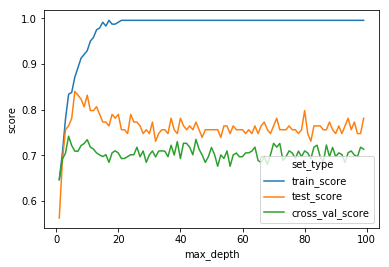

In [59]:
sns.lineplot(data=scores_data_long, x='max_depth', y='score', hue='set_type')